En esta parte se encuentra codigo de los mínimos cuadrados y con incertidumbre

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Ingresas tus datos de valor independiente, dependiente y error de y

x = np.linspace(1, 100000, 50)
y = 3 * x + 5 + np.random.normal(0, 10000, 50)
i = np.random.uniform(1, 5000, 50)

opcion = input("Que regresión quieres. 1) Minimos cuadrados. 2) Mínimo cuadrados con pesos: ")

if opcion == '1':
    guardar = input("¿Quieres guardar la imagen? (si) ")
    if guardar == "si":
        name = input("Nombre del archivo: ")
        minimos_cuadrados(x,y,i,name,True, True)
    else:
        minimos_cuadrados(x,y,i,"no",True, False)
elif opcion == '2':
    guardar = input("¿Quieres guardar la imagen? (si) ")
    if guardar == "si":
        name = input("Nombre del archivo: ")
        minimos_cuadrados_incertidumbre(x,y,i,name,True,True)
    else:
        minimos_cuadrados_incertidumbre(x,y,i,"no",True,False)


Que regresión quieres. 1) Minimos cuadrados. 2) Mínimo cuadrados con pesos: 0


In [14]:
def minimos_cuadrados(x,y,i,name="Regresion",plot = False, Descargar=False):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x_2 = np.sum(x**2)
    residuales = y-(m*x)+b
    m = (n*sum_xy-(sum_x*sum_y))/(n*sum_x_2-(abs(sum_x)**2))
    b = (sum_y*sum_x_2-sum_x*np.sum(x*y))/(n*sum_x_2-(abs(sum_x)**2))
    if plot:
        fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})
        axs[0].errorbar(x, y, yerr=i, fmt='o')       
        axs[0].plot(x,m*x+b)
        axs[1].scatter(x,residuales)
        axs[0].set_ylabel('Eje-y')
        axs[1].set_ylabel('Residuales')
        plt.xlabel('X') 
        plt.tight_layout()  
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    
    return pendiente,intercepto

x_ = np.array([15, 12.7,9.6,7.4,4.5,3.4])*0.01
y_ = [0.84,0.76, 0.69, 0.58, 0.45, 0.41]
w_ = np.ones([1,1, 1, 1, 1, 1])*0.05
minimos_cuadrados(x_,y_,w_, True)

UnboundLocalError: cannot access local variable 'm' where it is not associated with a value

Minimos cuadrados con incertidumbre

0.002297176591376324
4.234851129363449
Gravedad: 9.32226810303283
0.002297176591376324


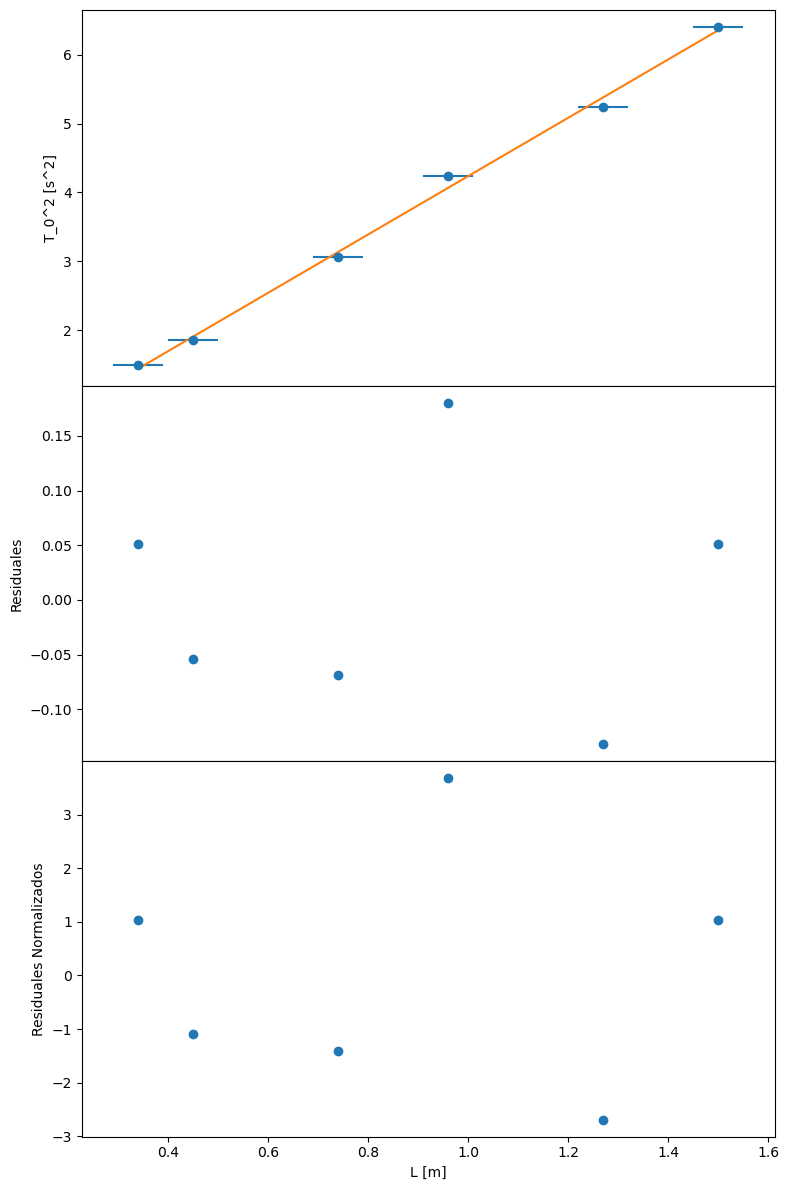

In [52]:
def minimos_cuadrados_incertidumbre(x,y,i,name="Regresion",plot = False,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x)+intercepto
    normalize_residuales = (y-pendiente*x+intercepto)/error_m
    print(intercepto)
    
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})
        axs[0].errorbar(x, y, xerr=i, fmt='o')       
        axs[0].plot(x,pendiente*x+intercepto)
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[0].set_ylabel('T_0^2 [s^2]')
        axs[1].set_ylabel('Residuales')
        axs[2].set_ylabel('Residuales Normalizados')
        plt.xlabel('L [m]')
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    return pendiente,intercepto, error_inter, error_m

x_ = np.array([1.50, 1.27,.96,.74,.45,.34])
y_ = np.array([2.53,2.29,2.06,1.75,1.36,1.22])**2
w_ = np.array([1,1, 1, 1, 1, 1])*0.05
m,b,e,e_ = minimos_cuadrados_incertidumbre(x_,y_,w_, plot =True)
print(m)
print("Gravedad:", 4*(np.pi**2)/m)

print(b)
